# Install Dependencies

## External Dependencies

In [1]:
!pip install pandas

## FrostAura Dependencies

In [2]:
import os
import sys

USE_LOCAL_CODE: bool = True # NOTE: When changing this configuration, be sure to restart the interpreter in order to have sys path updates reflect.
directories_to_move_up: int = 2
current_executing_path: str = os.getcwd()
current_executing_path = current_executing_path.replace('\\', '/')
root_path: str = '/'.join(current_executing_path.split('/')[:-directories_to_move_up])

# Clean up.
%pip uninstall frostaura -y
sys.path = [p for p in sys.path if p != root_path]

if USE_LOCAL_CODE:
    sys.path.append(root_path)
else:
    %pip install -U --no-cache-dir frostaura

Note: you may need to restart the kernel to use updated packages.


## Logging

In [3]:
import logging

logging.basicConfig(level=logging.DEBUG)

# Import Dependencies

In [4]:
%run ./asset_valuation_engine.finviz.ipynb

Note: you may need to restart the kernel to use updated packages.


INFO:root:Fetching HTML page from URL "https://finviz.com/quote.ashx?t=AAPL".
DEBUG:root:No key "user-agent" found in config. Defaulting to user agent value "PostmanRuntime/7.29.0".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): finviz.com:443
DEBUG:urllib3.connectionpool:https://finviz.com:443 "GET /quote.ashx?t=AAPL HTTP/1.1" 200 None
DEBUG:root:EPS: 6.05, EPS Next 5 Years: 0.0983%
DEBUG:root:P/E Ratio: 27.585, Current Price: $ 172.1
DEBUG:root:Intrinsic Value: $ 128.37634615384616 vs. Current Price: $ 172.1


DEBUG:root:Calculating profit for asset "TSLA".
INFO:root:Fetching historical price movements for symbol "TSLA".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/TSLA?period1=-631159200&period2=1660424390&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[TSLA] Processing transaction value $0.0688 on 2022-07-28 00:00:00.
DEBUG:root:Calculating profit for asset "AAPL".
INFO:root:Fetching historical price movements for symbol "AAPL".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/AAPL?period1=-631159200&period2=1660424391&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[AAPL] Processing transaction value $0.4317 on 2022-07-01 00:00:00.
DEBUG:root:Calculating profit for asset "DDD".
INFO:root:Fetching historical price movements for symbol "DDD".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connection

{'percentage': 6.4668673292609835, 'value': 16.69773357162481}


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Ahom' (NotoSerifAhom-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Ugaritic' (NotoSansUgaritic-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font '.SF NS Mono' (SFNSMono.ttf) normal normal 295 normal>) = 10.14975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) 

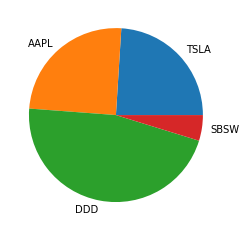

In [5]:
%run ./asset_calculations_engine.simple.ipynb

In [6]:
from frostaura.engines import IAssetProjectionEngine
from frostaura.engines import SimpleAssetProjectionEngine
import pandas as pd
from frostaura.engines import IAssetValuationEngine
from frostaura.engines import FinvizAssetValuationEngine
from frostaura.data_access import IResourcesDataAccess
from frostaura.data_access import HtmlResourcesDataAccess
from frostaura.models import ValuationResult

# Usage

In [7]:
instance: IAssetProjectionEngine = SimpleAssetProjectionEngine()
html_data_access: IResourcesDataAccess = HtmlResourcesDataAccess()
asset_valuation_engine: IAssetValuationEngine = FinvizAssetValuationEngine(html_data_access=html_data_access)

In [8]:
n_months: int = 12 # 1 year
usd_zar_exchange_rate: float = 16.17
annual_growth_rate: float = valuation.eps_five_years + (valuation.annual_dividend_percentage / 100)
initial_value: float = holdings['AAPL']['total_current_usd']
growth: pd.DataFrame = instance.project_monthly_asset_growth(n_months=n_months,
                                                             annual_growth_rate=annual_growth_rate,
                                                             principal_value=initial_value,
                                                             monthly_deposit=(1000 / usd_zar_exchange_rate / 4))

growth

,deposits_withdrawals,interest,total_deposits_withdrawals,accrued_interest,balance
month,,,,,
0,0.00000,0.000000,0.000000,0.000000,74.295573
1,15.46073,0.641418,15.460730,0.641418,90.397721
2,15.46073,0.780434,30.921459,1.421852,106.638884
3,15.46073,0.920649,46.382189,2.342501,123.020263
4,15.46073,1.062075,61.842919,3.404576,139.543068
5,15.46073,1.204722,77.303649,4.609298,156.208519
6,15.46073,1.348600,92.764378,5.957898,173.017849
7,15.46073,1.493721,108.225108,7.451619,189.972300
8,15.46073,1.640094,123.685838,9.091713,207.073124


In [9]:
annual_growth_rates: list = list()
principal_values: list = list()
monthly_deposits: list = list()

for symbol in holdings:
    company_name: str = holdings[symbol]['name']
    symbol_valuation: ValuationResult = asset_valuation_engine.valuate(company_name=company_name, symbol=symbol)
    annual_growth_rate: float = symbol_valuation.eps_five_years

    if symbol_valuation.annual_dividend_percentage is not None:
        annual_growth_rate += (symbol_valuation.annual_dividend_percentage / 100)

    annual_growth_rates.append(annual_growth_rate)
    principal_values.append(holdings[symbol]['total_current_usd'])
    monthly_deposits.append((1000 / usd_zar_exchange_rate / len(holdings)))

holdings_growth: pd.DataFrame = instance.project_monthly_holdings_growth(n_months=n_months,
                                                                         annual_growth_rates=annual_growth_rates,
                                                                         principal_values=principal_values,
                                                                         monthly_deposits=monthly_deposits)

holdings_growth

INFO:root:Fetching HTML page from URL "https://finviz.com/quote.ashx?t=TSLA".
DEBUG:root:User agent override found in config. Using value "PostmanRuntime/7.29.0".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): finviz.com:443
DEBUG:urllib3.connectionpool:https://finviz.com:443 "GET /quote.ashx?t=TSLA HTTP/1.1" 200 None
DEBUG:root:EPS: 8.33, EPS Next 5 Years: 0.5189%
DEBUG:root:P/E Ratio: 80.48, Current Price: $ 900.09
DEBUG:root:Intrinsic Value: $ 515.6910769230769 vs. Current Price: $ 900.09
INFO:root:Fetching HTML page from URL "https://finviz.com/quote.ashx?t=AAPL".
DEBUG:root:User agent override found in config. Using value "PostmanRuntime/7.29.0".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): finviz.com:443
DEBUG:urllib3.connectionpool:https://finviz.com:443 "GET /quote.ashx?t=AAPL HTTP/1.1" 200 None
DEBUG:root:EPS: 6.05, EPS Next 5 Years: 0.0983%
DEBUG:root:P/E Ratio: 27.585, Current Price: $ 172.1
DEBUG:root:Intrinsic Value: $ 128.37634615384616

,month,deposits_withdrawals,interest,total_deposits_withdrawals,accrued_interest,balance
